Statistical Features of extrema (peaks and troughs)
Vincent Chan. August 7, 2024
Mov 1, 2, 3

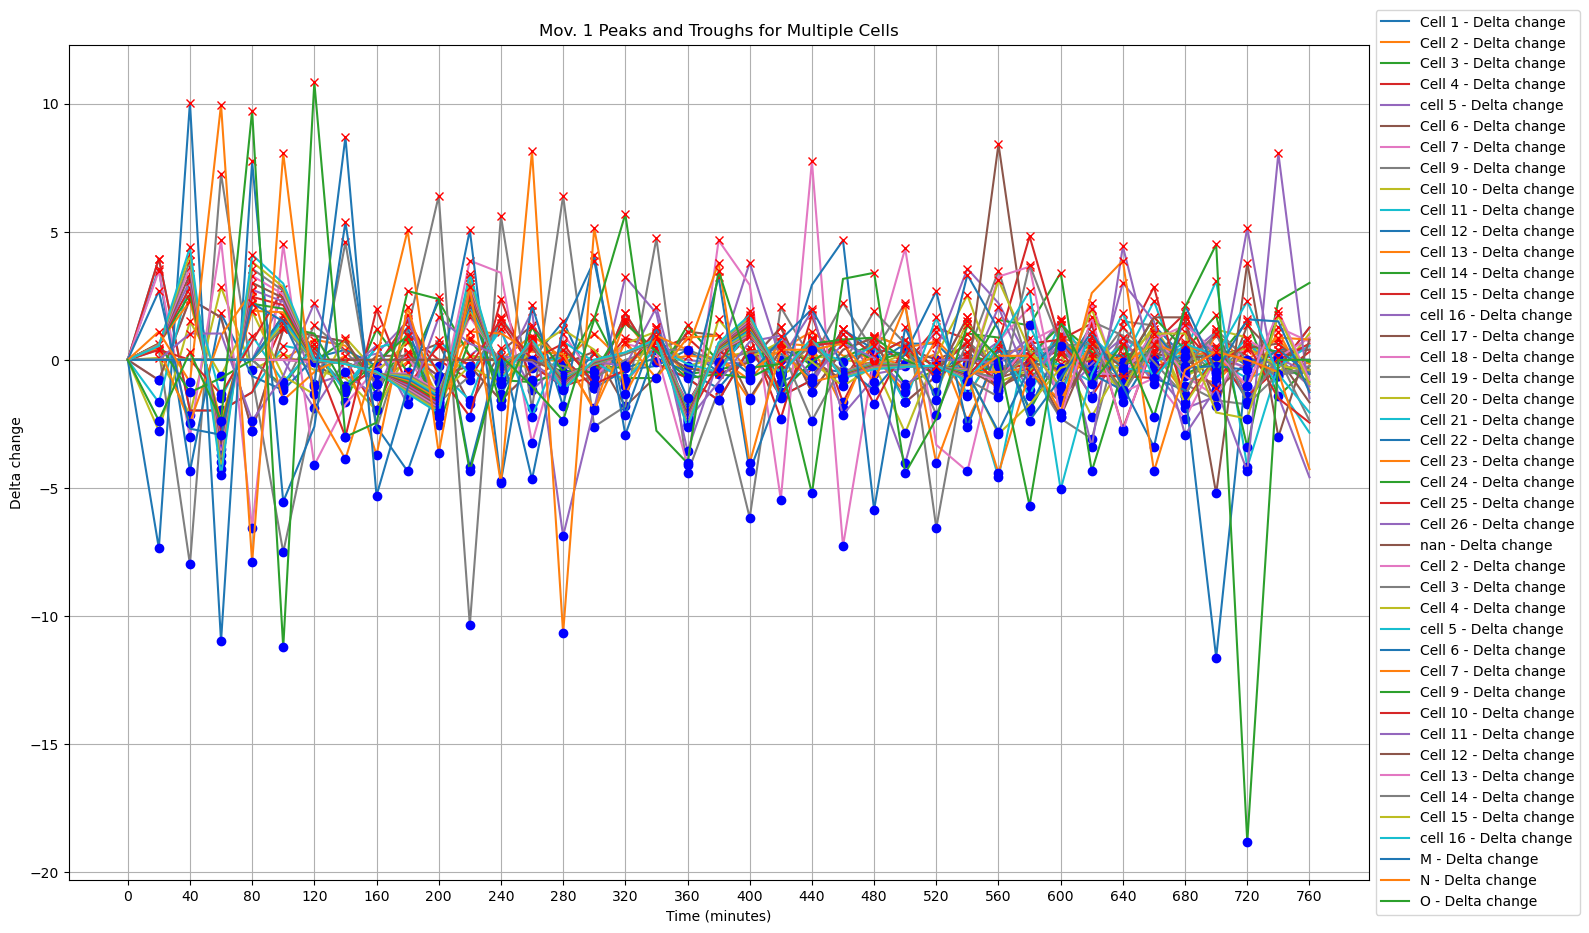

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the data from the Excel file
file_path = 'Delta cell area.xlsx'
sheet_name = 'Mov. 1'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the headers from D2 onwards
plot_titles = data.iloc[0, 3:].to_numpy()

# Time axis based on 20-minute intervals starting from 0 minutes
time_intervals = np.arange(0, 20 * len(data.iloc[1:, 3]), 20)

# Initialize the plot with a larger size
plt.figure(figsize=(16, 10))

# Process each column (cell data) from D3 onwards
for idx, col in enumerate(data.columns[3:]):
    series = data[col].iloc[1:].fillna(0).to_numpy()  # Convert to numpy array for processing (all rows starting from row 2)
    peaks, _ = find_peaks(series)
    troughs, _ = find_peaks(-series)
    
    # Plot titles
    title = plot_titles[idx]
    
    # Plot the data with identified peaks and troughs
    plt.plot(time_intervals, series, label=f'{title} - Delta change')
    plt.plot(time_intervals[peaks], series[peaks], "x", color='red')  # No label for peaks
    plt.plot(time_intervals[troughs], series[troughs], "o", color='blue')  # No label for troughs

# Finalize the plot
plt.title('Mov. 1 Peaks and Troughs for Multiple Cells')
plt.xlabel('Time (minutes)')
plt.ylabel('Delta change')
plt.xticks(np.arange(0, max(time_intervals) + 1, 40))  # Show more time values at every 40 minutes
plt.grid(True)  # Add grid lines

# Position the legend outside the plot (only for the data series)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


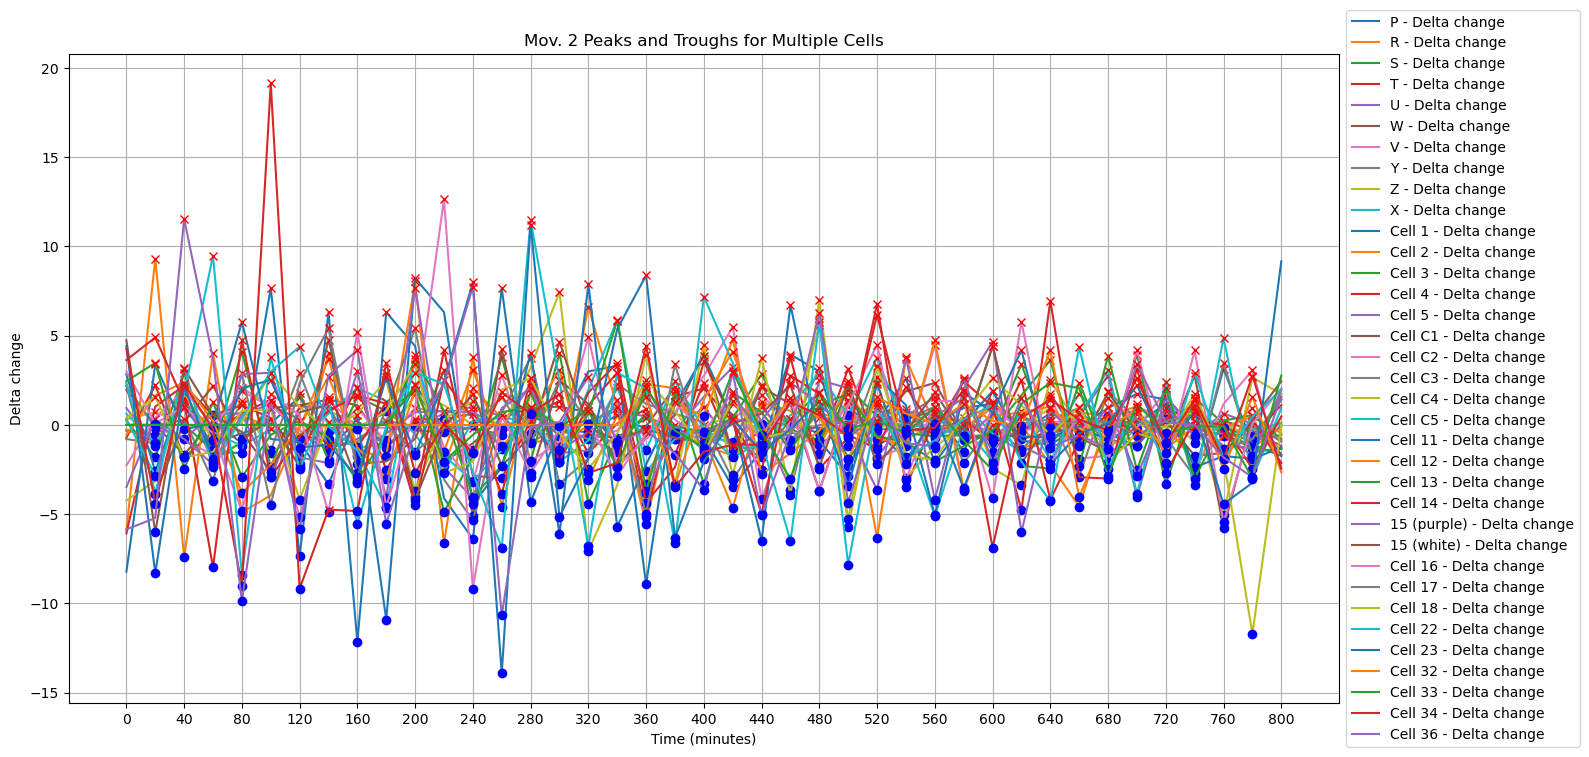

In [40]:
# Load the data from the Excel file
file_path = 'Delta cell area.xlsx'
sheet_name = 'Mov. 2'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the headers from D2 onwards
plot_titles = data.iloc[0, 3:].to_numpy()

# Time axis based on 20-minute intervals starting from 0 minutes
time_intervals = np.arange(0, 20 * len(data.iloc[1:, 3]), 20)

# Initialize the plot with a larger size
plt.figure(figsize=(16, 8))

# Process each column (cell data) from D3 onwards
for idx, col in enumerate(data.columns[3:]):
    series = data[col].iloc[1:].fillna(0).to_numpy()  # Convert to numpy array for processing (all rows starting from row 2)
    peaks, _ = find_peaks(series)
    troughs, _ = find_peaks(-series)
    
    # Plot titles
    title = plot_titles[idx]
    
    # Plot the data with identified peaks and troughs
    plt.plot(time_intervals, series, label=f'{title} - Delta change')
    plt.plot(time_intervals[peaks], series[peaks], "x", color='red')  # No label for peaks
    plt.plot(time_intervals[troughs], series[troughs], "o", color='blue')  # No label for troughs

# Finalize the plot
plt.title('Mov. 2 Peaks and Troughs for Multiple Cells')
plt.xlabel('Time (minutes)')
plt.ylabel('Delta change')
plt.xticks(np.arange(0, max(time_intervals) + 1, 40))  # Show more time values at every 40 minutes
plt.grid(True)  # Add grid lines

# Position the legend outside the plot (only for the data series)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

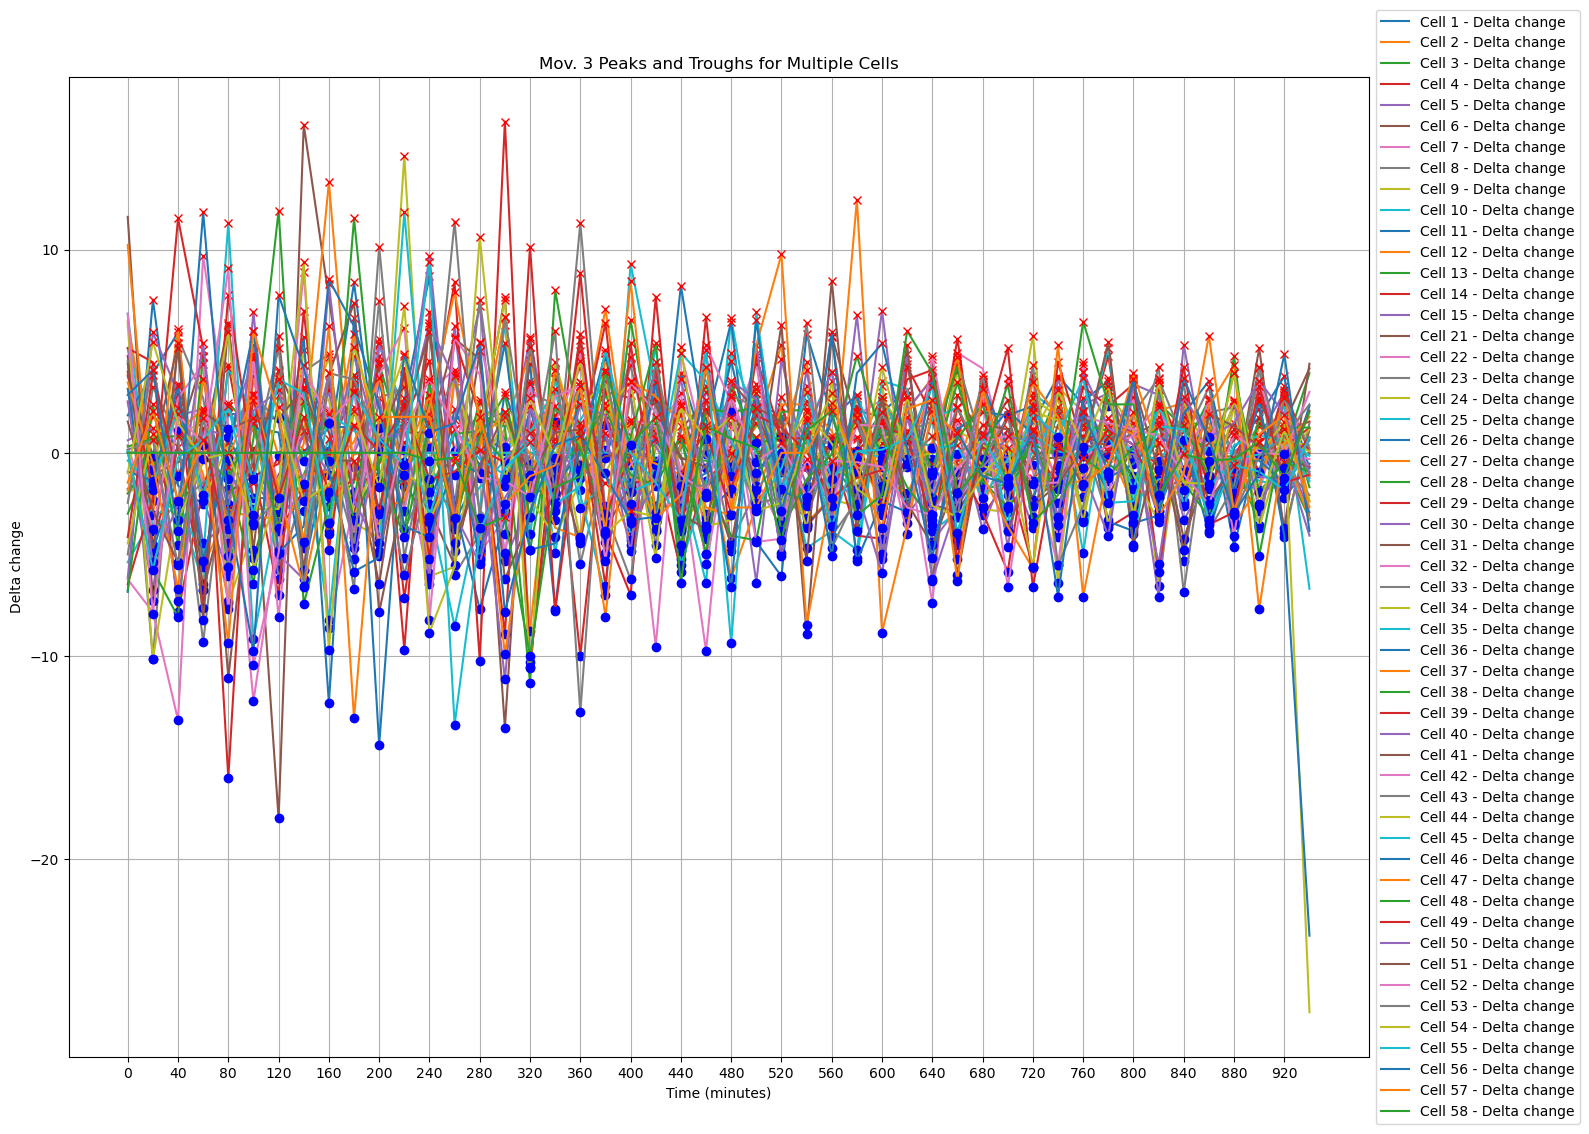

In [41]:
# Load the data from the Excel file
file_path = 'Delta cell area.xlsx'
sheet_name = 'Mov. 3'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the headers from D2 onwards
plot_titles = data.iloc[0, 3:].to_numpy()

# Time axis based on 20-minute intervals starting from 0 minutes
time_intervals = np.arange(0, 20 * len(data.iloc[1:, 3]), 20)

# Initialize the plot with a larger size
plt.figure(figsize=(16, 12))

# Process each column (cell data) from D3 onwards
for idx, col in enumerate(data.columns[3:]):
    series = data[col].iloc[1:].fillna(0).to_numpy()  # Convert to numpy array for processing (all rows starting from row 2)
    peaks, _ = find_peaks(series)
    troughs, _ = find_peaks(-series)
    
    # Plot titles
    title = plot_titles[idx]
    
    # Plot the data with identified peaks and troughs
    plt.plot(time_intervals, series, label=f'{title} - Delta change')
    plt.plot(time_intervals[peaks], series[peaks], "x", color='red')  # No label for peaks
    plt.plot(time_intervals[troughs], series[troughs], "o", color='blue')  # No label for troughs

# Finalize the plot
plt.title('Mov. 3 Peaks and Troughs for Multiple Cells')
plt.xlabel('Time (minutes)')
plt.ylabel('Delta change')
plt.xticks(np.arange(0, max(time_intervals) + 1, 40))  # Show more time values at every 40 minutes
plt.grid(True)  # Add grid lines

# Position the legend outside the plot (only for the data series)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [46]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis, entropy

# Load the data from the Excel file
file_path = 'Delta cell area.xlsx'
sheet_names = ['Mov. 1', 'Mov. 2', 'Mov. 3']

# Function to add small noise to the data
def add_noise(data, noise_level=1e-9):
    noise = np.random.normal(0, noise_level, len(data))
    return data + noise

# Function to calculate statistical features
def calculate_features(series, time_intervals):
    peaks, _ = find_peaks(series)
    troughs, _ = find_peaks(-series)
    
    features = {}
    
    # Frequency of peaks and troughs per 12-hour period (12 hours = 720 minutes)
    features['Peak_Frequency'] = len(peaks) / (time_intervals[-1] / 720)
    features['Trough_Frequency'] = len(troughs) / (time_intervals[-1] / 720)
    
    if len(peaks) > 0 and len(troughs) > 0:
        # Amplitude features
        peak_amplitudes = series[peaks]
        trough_amplitudes = series[troughs]
        
        # Align lengths of peak and trough amplitudes
        min_length = min(len(peak_amplitudes), len(trough_amplitudes))
        peak_amplitudes = peak_amplitudes[:min_length]
        trough_amplitudes = trough_amplitudes[:min_length]
        
        amplitude_diffs = peak_amplitudes - trough_amplitudes

        features['Peak_Amplitude_Mean'] = np.mean(peak_amplitudes)
        features['Trough_Amplitude_Mean'] = np.mean(trough_amplitudes)
        features['Amplitude_Diff_Mean'] = np.mean(amplitude_diffs)

        features['Peak_Amplitude_Std'] = np.std(peak_amplitudes)
        features['Trough_Amplitude_Std'] = np.std(trough_amplitudes)
        features['Amplitude_Diff_Std'] = np.std(amplitude_diffs)

        features['Peak_Amplitude_Range'] = np.ptp(peak_amplitudes)
        features['Trough_Amplitude_Range'] = np.ptp(trough_amplitudes)
        features['Amplitude_Diff_Range'] = np.ptp(amplitude_diffs)

        features['Peak_Amplitude_Skewness'] = skew(peak_amplitudes)
        features['Trough_Amplitude_Skewness'] = skew(trough_amplitudes)
        features['Amplitude_Diff_Skewness'] = skew(amplitude_diffs)

        features['Peak_Amplitude_Kurtosis'] = kurtosis(peak_amplitudes)
        features['Trough_Amplitude_Kurtosis'] = kurtosis(trough_amplitudes)
        features['Amplitude_Diff_Kurtosis'] = kurtosis(amplitude_diffs)

        features['Peak_Amplitude_Entropy'] = entropy(peak_amplitudes)
        features['Trough_Amplitude_Entropy'] = entropy(trough_amplitudes)
        features['Amplitude_Diff_Entropy'] = entropy(amplitude_diffs)
    
        # Peak and Trough Intervals
        if len(peaks) > 1:
            peak_intervals = add_noise(np.diff(time_intervals[peaks]))
            features['Peak_Interval_Mean'] = np.mean(peak_intervals)
            features['Peak_Interval_Std'] = np.std(peak_intervals)
            features['Peak_Interval_Range'] = np.ptp(peak_intervals)
            features['Peak_Interval_Skewness'] = skew(peak_intervals)
            features['Peak_Interval_Kurtosis'] = kurtosis(peak_intervals)
            features['Peak_Interval_Entropy'] = entropy(peak_intervals)
        else:
            features['Peak_Interval_Mean'] = np.nan
            features['Peak_Interval_Std'] = np.nan
            features['Peak_Interval_Range'] = np.nan
            features['Peak_Interval_Skewness'] = np.nan
            features['Peak_Interval_Kurtosis'] = np.nan
            features['Peak_Interval_Entropy'] = np.nan

        if len(troughs) > 1:
            trough_intervals = add_noise(np.diff(time_intervals[troughs]))
            features['Trough_Interval_Mean'] = np.mean(trough_intervals)
            features['Trough_Interval_Std'] = np.std(trough_intervals)
            features['Trough_Interval_Range'] = np.ptp(trough_intervals)
            features['Trough_Interval_Skewness'] = skew(trough_intervals)
            features['Trough_Interval_Kurtosis'] = kurtosis(trough_intervals)
            features['Trough_Interval_Entropy'] = entropy(trough_intervals)
        else:
            features['Trough_Interval_Mean'] = np.nan
            features['Trough_Interval_Std'] = np.nan
            features['Trough_Interval_Range'] = np.nan
            features['Trough_Interval_Skewness'] = np.nan
            features['Trough_Interval_Kurtosis'] = np.nan
            features['Trough_Interval_Entropy'] = np.nan
        
        # Peak-to-Trough Analysis
        if len(peaks) > 0 and len(troughs) > 0:
            peak_to_trough_intervals = add_noise(time_intervals[troughs[:min_length]] - time_intervals[peaks[:min_length]])
            features['Peak_to_Trough_Interval_Mean'] = np.mean(peak_to_trough_intervals)
            features['Peak_to_Trough_Interval_Std'] = np.std(peak_to_trough_intervals)
            features['Peak_to_Trough_Interval_Range'] = np.ptp(peak_to_trough_intervals)
            features['Peak_to_Trough_Interval_Skewness'] = skew(peak_to_trough_intervals)
            features['Peak_to_Trough_Interval_Kurtosis'] = kurtosis(peak_to_trough_intervals)
            features['Peak_to_Trough_Interval_Entropy'] = entropy(peak_to_trough_intervals)
        else:
            features['Peak_to_Trough_Interval_Mean'] = np.nan
            features['Peak_to_Trough_Interval_Std'] = np.nan
            features['Peak_to_Trough_Interval_Range'] = np.nan
            features['Peak_to_Trough_Interval_Skewness'] = np.nan
            features['Peak_to_Trough_Interval_Kurtosis'] = np.nan
            features['Peak_to_Trough_Interval_Entropy'] = np.nan

    return features

# Process each sheet
results = []
for sheet_name in sheet_names:
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    plot_titles = data.iloc[0, 3:].to_numpy()
    time_intervals = np.arange(0, 20 * len(data.iloc[1:, 3]), 20)
    
    for idx, col in enumerate(data.columns[3:]):
        series = data[col].iloc[1:].fillna(0).to_numpy()  # Convert to numpy array for processing (all rows starting from row 2)
        features = calculate_features(series, time_intervals)
        features['Title'] = plot_titles[idx]
        features['Movement'] = sheet_name
        results.append(features)

# Convert results to DataFrame 
features_df = pd.DataFrame(results)

# Show Results
print(features_df)


     Peak_Frequency  Trough_Frequency  Peak_Amplitude_Mean  \
0          8.526316          8.526316             0.720189   
1         12.315789         11.368421             0.592833   
2         11.368421         12.315789             0.790333   
3         10.421053         11.368421             0.955745   
4         11.368421         11.368421             0.797050   
..              ...               ...                  ...   
126       14.553191         13.787234             3.099239   
127       11.489362         12.255319             3.144553   
128       12.255319         11.489362             4.529573   
129       12.255319         11.489362             3.595967   
130        8.425532          9.191489             2.007609   

     Trough_Amplitude_Mean  Amplitude_Diff_Mean  Peak_Amplitude_Std  \
0                -0.764100             1.484289            0.566880   
1                -0.592842             1.185675            0.381154   
2                -0.704833             1.4

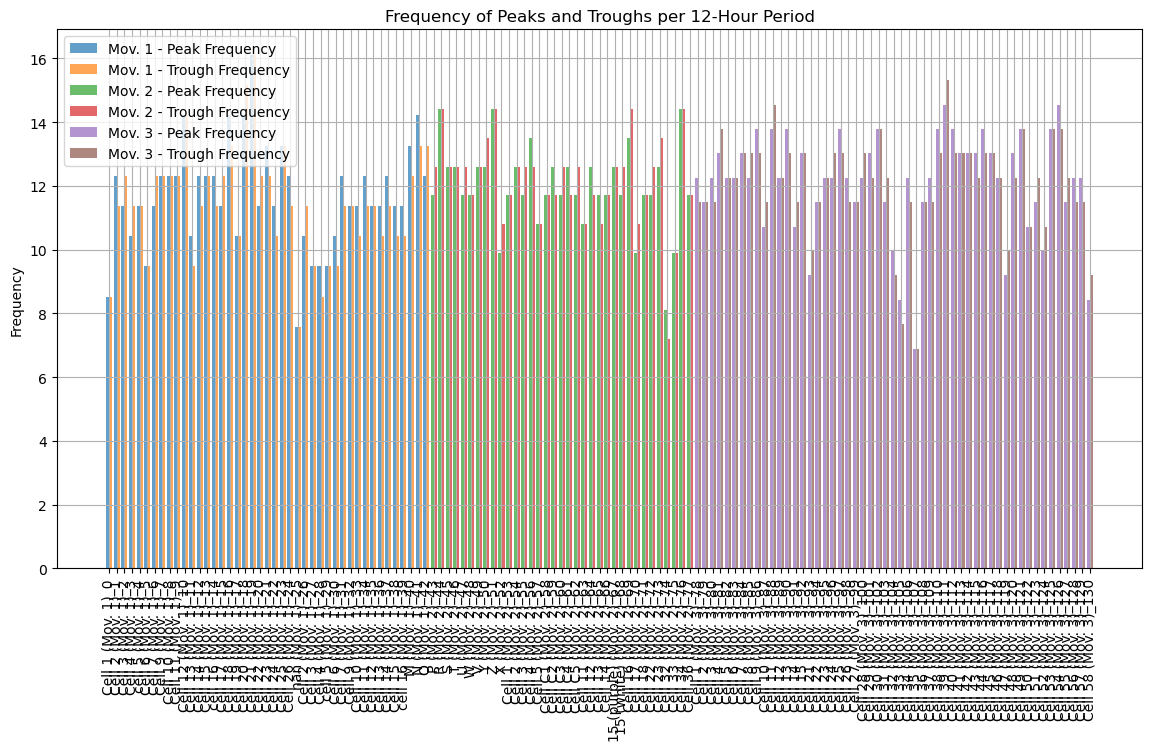

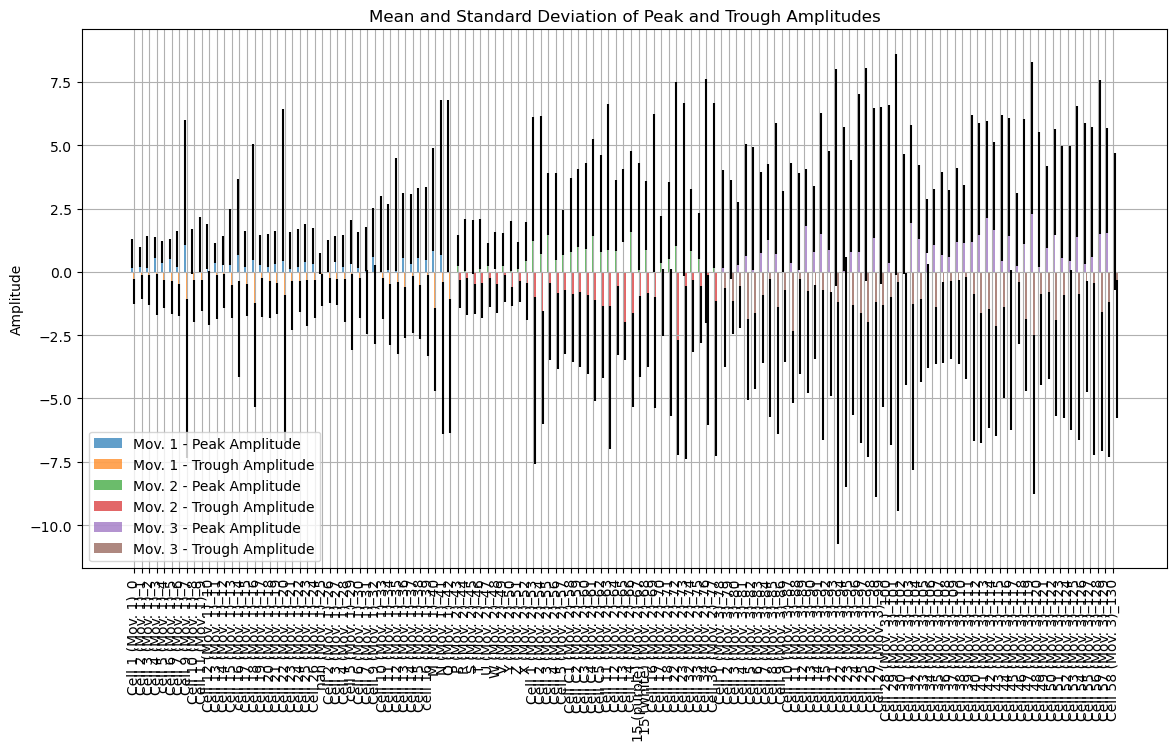

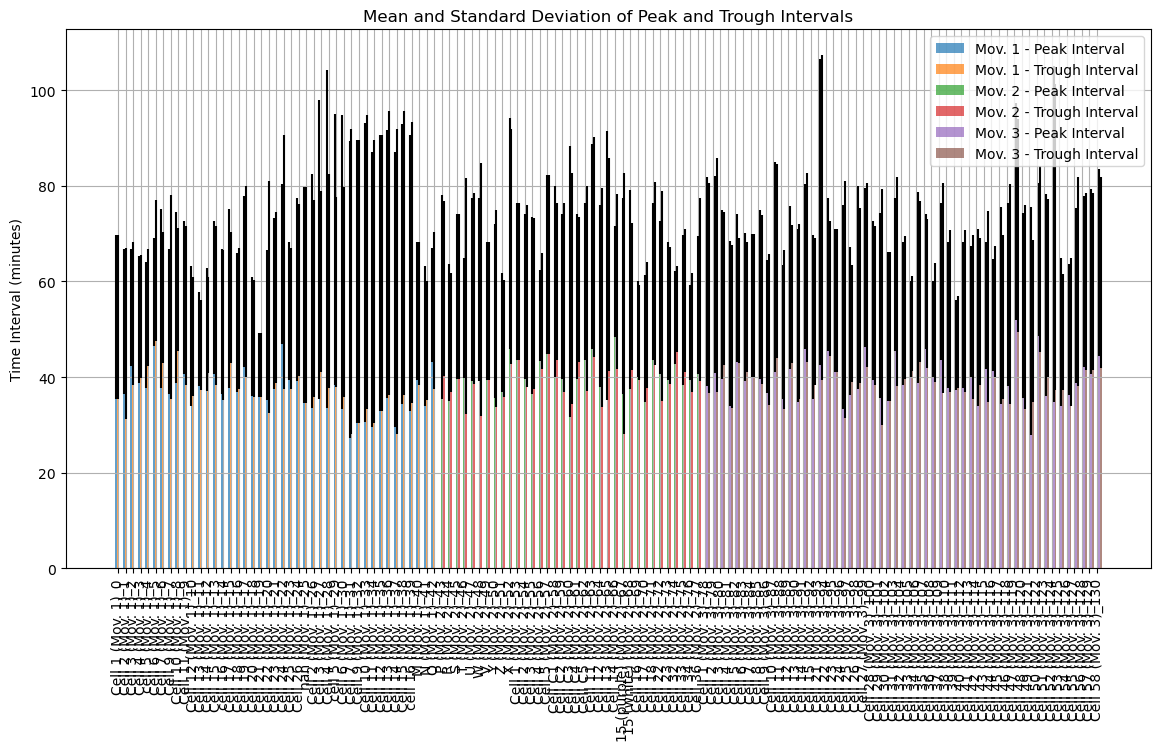

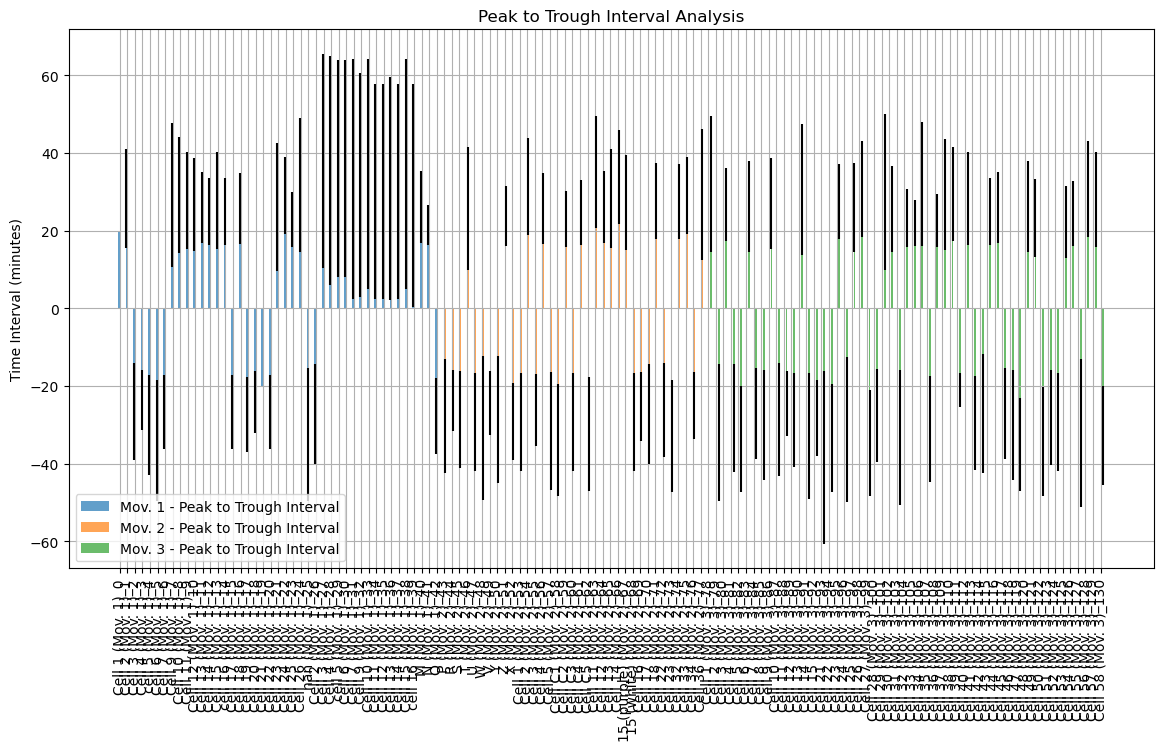

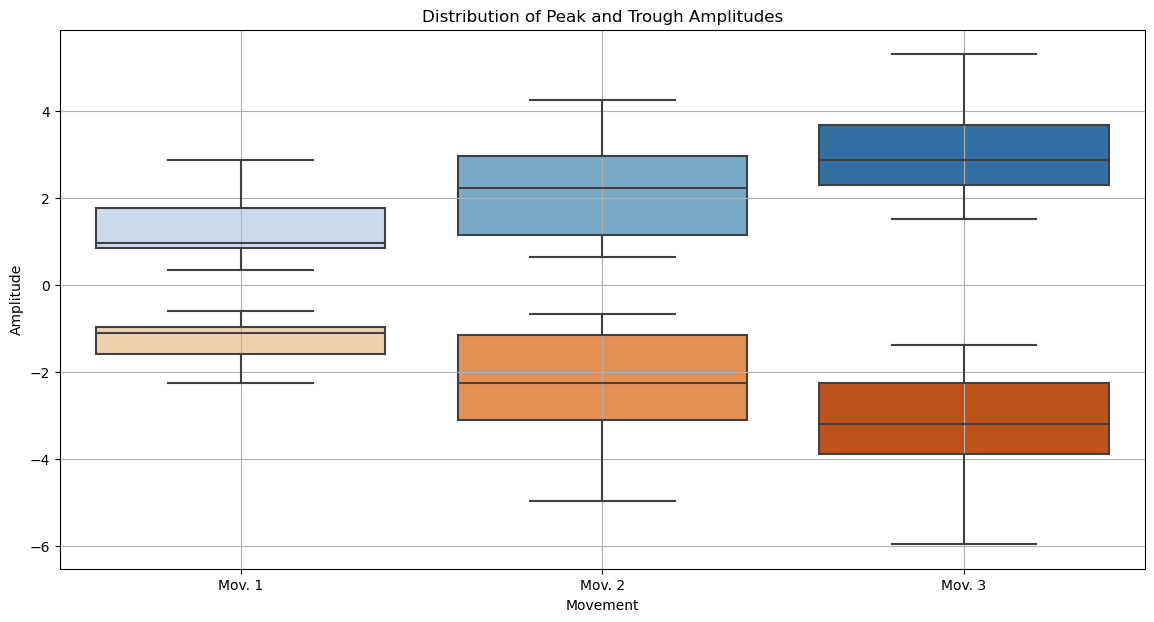

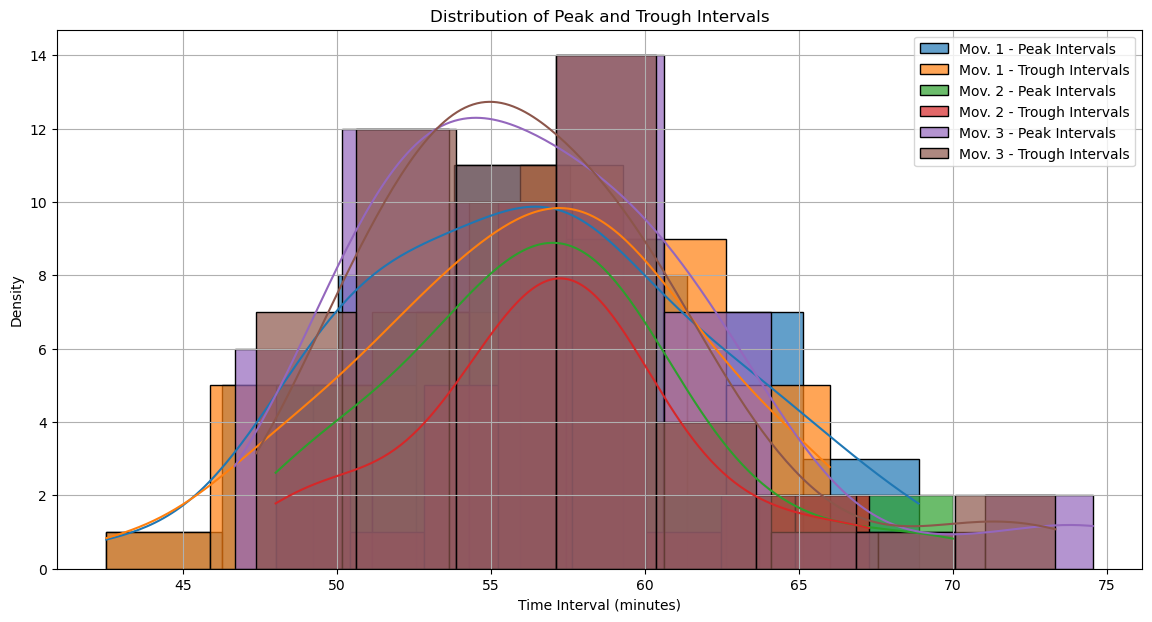

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure the Title column is converted to string
features_df['Title'] = features_df['Title'].astype(str)

# Create a truly unique identifier for each title by adding the index
features_df['Unique_Title'] = features_df['Title'] + ' (' + features_df['Movement'] + ')_' + features_df.index.astype(str)

# Get all unique titles
titles = features_df['Unique_Title'].unique()

# 1. Frequency of Peaks and Troughs
plt.figure(figsize=(14, 7))
for mov in features_df['Movement'].unique():
    mov_df = features_df[features_df['Movement'] == mov]
    # Align data by reindexing to ensure all titles are present
    aligned_mov_df = mov_df.set_index('Unique_Title').reindex(titles).reset_index()
    indices = np.arange(len(aligned_mov_df))
    plt.bar(indices - 0.2, aligned_mov_df['Peak_Frequency'], width=0.4, label=f'{mov} - Peak Frequency', alpha=0.7)
    plt.bar(indices + 0.2, aligned_mov_df['Trough_Frequency'], width=0.4, label=f'{mov} - Trough Frequency', alpha=0.7)

plt.xticks(indices, titles, rotation=90)
plt.ylabel('Frequency')
plt.title('Frequency of Peaks and Troughs per 12-Hour Period')
plt.legend()
plt.grid(True)
plt.show()

# 2. Amplitude Statistics (Mean and Std)
plt.figure(figsize=(14, 7))
width = 0.25

for i, mov in enumerate(features_df['Movement'].unique()):
    mov_df = features_df[features_df['Movement'] == mov]
    # Align data by reindexing to ensure all titles are present
    aligned_mov_df = mov_df.set_index('Unique_Title').reindex(titles).reset_index()
    indices = np.arange(len(aligned_mov_df))
    plt.bar(indices + i * width - width, aligned_mov_df['Peak_Amplitude_Mean'], width, yerr=aligned_mov_df['Peak_Amplitude_Std'], label=f'{mov} - Peak Amplitude', alpha=0.7)
    plt.bar(indices + i * width, aligned_mov_df['Trough_Amplitude_Mean'], width, yerr=aligned_mov_df['Trough_Amplitude_Std'], label=f'{mov} - Trough Amplitude', alpha=0.7)

plt.xticks(indices, titles, rotation=90)
plt.ylabel('Amplitude')
plt.title('Mean and Standard Deviation of Peak and Trough Amplitudes')
plt.legend()
plt.grid(True)
plt.show()

# 3. Interval Statistics (Mean and Std)
plt.figure(figsize=(14, 7))

for i, mov in enumerate(features_df['Movement'].unique()):
    mov_df = features_df[features_df['Movement'] == mov]
    # Align data by reindexing to ensure all titles are present
    aligned_mov_df = mov_df.set_index('Unique_Title').reindex(titles).reset_index()
    indices = np.arange(len(aligned_mov_df))
    plt.bar(indices + i * width - width, aligned_mov_df['Peak_Interval_Mean'], width, yerr=aligned_mov_df['Peak_Interval_Std'], label=f'{mov} - Peak Interval', alpha=0.7)
    plt.bar(indices + i * width, aligned_mov_df['Trough_Interval_Mean'], width, yerr=aligned_mov_df['Trough_Interval_Std'], label=f'{mov} - Trough Interval', alpha=0.7)

plt.xticks(indices, titles, rotation=90)
plt.ylabel('Time Interval (minutes)')
plt.title('Mean and Standard Deviation of Peak and Trough Intervals')
plt.legend()
plt.grid(True)
plt.show()

# 4. Peak-to-Trough Analysis
plt.figure(figsize=(14, 7))

for i, mov in enumerate(features_df['Movement'].unique()):
    mov_df = features_df[features_df['Movement'] == mov]
    # Align data by reindexing to ensure all titles are present
    aligned_mov_df = mov_df.set_index('Unique_Title').reindex(titles).reset_index()
    indices = np.arange(len(aligned_mov_df))
    plt.bar(indices + i * width - width / 2, aligned_mov_df['Peak_to_Trough_Interval_Mean'], width, yerr=aligned_mov_df['Peak_to_Trough_Interval_Std'], label=f'{mov} - Peak to Trough Interval', alpha=0.7)

plt.xticks(indices, titles, rotation=90)
plt.ylabel('Time Interval (minutes)')
plt.title('Peak to Trough Interval Analysis')
plt.legend()
plt.grid(True)
plt.show()

# 5. Boxplots for Amplitude Distributions
plt.figure(figsize=(14, 7))
sns.boxplot(x='Movement', y='Peak_Amplitude_Mean', data=features_df, palette='Blues', showfliers=False)
sns.boxplot(x='Movement', y='Trough_Amplitude_Mean', data=features_df, palette='Oranges', showfliers=False)
plt.title('Distribution of Peak and Trough Amplitudes')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 6. Histograms for Interval Distributions
plt.figure(figsize=(14, 7))
for mov in features_df['Movement'].unique():
    mov_df = features_df[features_df['Movement'] == mov]
    sns.histplot(mov_df['Peak_Interval_Mean'], kde=True, label=f'{mov} - Peak Intervals', alpha=0.7)
    sns.histplot(mov_df['Trough_Interval_Mean'], kde=True, label=f'{mov} - Trough Intervals', alpha=0.7)

plt.title('Distribution of Peak and Trough Intervals')
plt.xlabel('Time Interval (minutes)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
